In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator( 
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)

train_set = train_datagen.flow_from_directory(
        '../dataset/training_set',
        target_size=(64, 64),
        batch_size=32,
        class_mode='binary')

Found 8000 images belonging to 2 classes.


In [5]:
test_datagen = ImageDataGenerator(rescale=1./255)

test_set = test_datagen.flow_from_directory(
        '../dataset/test_set/',
        target_size=(64, 64),
        batch_size=32,
        class_mode='binary')

Found 2000 images belonging to 2 classes.


In [23]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten

cnn = Sequential()
cnn.add(Conv2D(filters=64, kernel_size=3, activation="relu", input_shape=(64, 64, 3)))
cnn.add(MaxPool2D(pool_size=2, strides=2))
cnn.add(Conv2D(filters=64, kernel_size=3, activation="relu"))
cnn.add(MaxPool2D(pool_size=2, strides=2))
cnn.add(Conv2D(filters=64, kernel_size=3, activation="relu"))
cnn.add(MaxPool2D(pool_size=2, strides=2))
cnn.add(Flatten())
cnn.add(Dense(units=128, activation="relu"))
cnn.add(Dense(units=1, activation="sigmoid"))

In [24]:
cnn.compile(optimizer="adam", loss="binary_crossentropy", metrics=['accuracy'])
cnn.fit(x=train_set, validation_data=test_set, epochs=25)

  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 250 steps, validate for 63 steps
Epoch 1/25
250/250 [==============================] - 85s 341ms/step - loss: 0.6809 - accuracy: 0.5614 - val_loss: 0.6624 - val_accuracy: 0.6370
Epoch 2/25
250/250 [==============================] - 41s 163ms/step - loss: 0.6270 - accuracy: 0.6511 - val_loss: 0.5816 - val_accuracy: 0.7185
Epoch 3/25
250/250 [==============================] - 41s 164ms/step - loss: 0.5800 - accuracy: 0.6957 - val_loss: 0.5307 - val_accuracy: 0.7455
Epoch 4/25
250/250 [==============================] - 41s 165ms/step - loss: 0.5400 - accuracy: 0.7305 - val_loss: 0.5342 - val_accuracy: 0.7250
Epoch 5/25
250/250 [==============================] - 42s 169ms/step - loss: 0.5149 - accuracy: 0.7454 - val_loss: 0.5115 - val_accuracy: 0.7530
Epoch 6/25
250/250 [==============================] - 43s 174ms/step - loss: 0.4870 - accuracy: 0.7641 - val_loss: 0.4752 - val_accuracy: 0.7735
Epoch 7/25
250/250 [=================

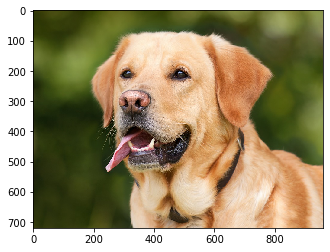

In [65]:
image = plt.imread('../dataset/single_prediction/cat_or_dog_1.jpg')
plt.imshow(image)

In [66]:
from keras.preprocessing import image

test_image = image.load_img('../dataset/single_prediction/cat_or_dog_1.jpg', target_size=(64,64))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis=0)
result = cnn.predict(test_image)
train_set.class_indices
if result[0][0] == 1:
    prediction = 'dog'
else:
    prediction = 'cat'
print(prediction)

dog


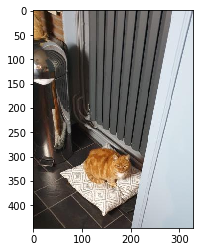

In [62]:
image = plt.imread('../dataset/single_prediction/cat_in_environment.png')
plt.imshow(image)

In [63]:
from keras.preprocessing import image
test_image = image.load_img('../dataset/single_prediction/cat_in_environment.png', target_size=(64,64))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis=0)
result = cnn.predict(test_image)
train_set.class_indices
if result[0][0] == 1:
    prediction = 'dog'
else:
    prediction = 'cat'
print(prediction)

cat


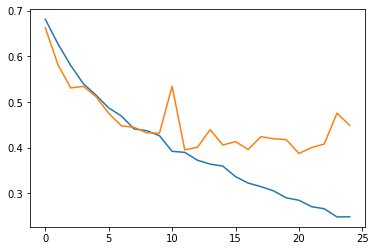

In [32]:
model_history = cnn.history.history

import matplotlib.pyplot as plt
plt.plot(model_history['loss'], label="loss")
plt.plot(model_history['val_loss'], label="validation loss")
plt.show()

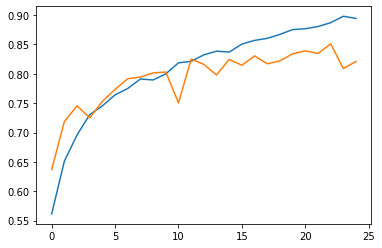

In [33]:
plt.plot(model_history['accuracy'], label="accuracy")
plt.plot(model_history['val_accuracy'], label="validation accuracy")
plt.show()